In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
dataset = mnist.load_data('mnist.db')

In [3]:
train,test = dataset

In [4]:
len(train)

2

In [5]:
X_train, y_train = train

In [6]:
X_test, y_test = test

In [7]:
len(X_train)

60000

In [8]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train[0].ndim

2

In [11]:
img = X_train[1]

In [12]:
X_train = X_train.reshape(-1,28*28)

In [13]:
X_train.shape

(60000, 784)

In [14]:
X_test = X_test.reshape(-1, 28*28)

In [15]:
X_test.shape

(10000, 784)

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
y_train = to_categorical(y_train)

In [18]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# Model

In [19]:
model = Sequential()

In [20]:
model.add( 
    Dense(units = 512 , input_shape = (784,) , activation = 'relu' )
)
model.add( 
    Dense(units = 256 , activation = 'relu' )
)
model.add( 
    Dense(units = 128 , activation = 'relu' )
)
model.add( 
    Dense(units = 64 , activation = 'relu' )
)
model.add( 
    Dense(units = 10 , activation = 'softmax' )
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(
    optimizer='adam',
    
    loss='categorical_crossentropy',
    
    metrics=['accuracy']
)

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 17s 10ms/step - loss: 0.7187 - accuracy: 0.8912 - val_loss: 0.2052 - val_accuracy: 0.9451
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1797 - accuracy: 0.9492 - val_loss: 0.2156 - val_accuracy: 0.9402
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1488 - accuracy: 0.9578 - val_loss: 0.1327 - val_accuracy: 0.9645
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1252 - accuracy: 0.9649 - val_loss: 0.1385 - val_accuracy: 0.9635
Epoch 5/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1078 - accuracy: 0.9699 - val_loss: 0.1363 - val_accuracy: 0.9639
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0960 - accuracy: 0.9732 - val_loss: 0.1641 - val_accuracy: 0.9619
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0865 - accuracy: 0.9769 - val_loss: 0.1342 - va

In [24]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, to_categorical(y_test))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.1223 - accuracy: 0.9713
Test Accuracy: 97.13%


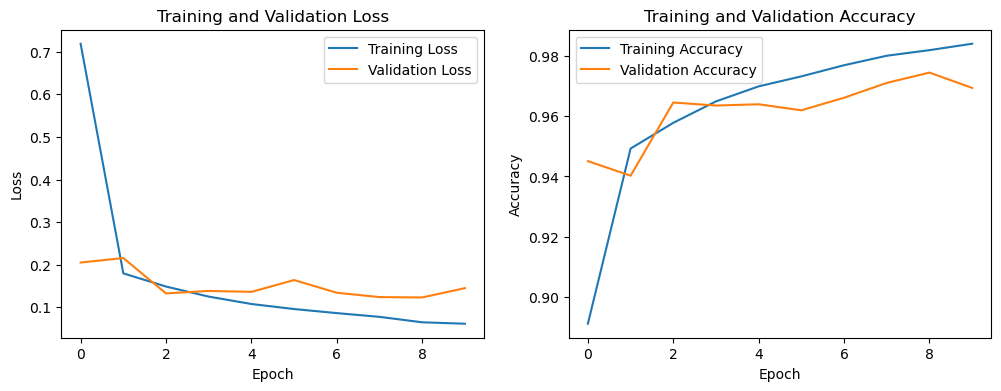

In [25]:
# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

In [26]:
sample_images = X_test

In [27]:
predictions = model.predict(sample_images)

313/313 [==============================] - 2s 5ms/step


In [28]:
print(predictions)

[[6.7715897e-17 5.6763250e-10 1.8084333e-07 ... 9.9998277e-01
  1.8313205e-12 1.6831955e-05]
 [4.9272638e-11 1.3338832e-13 9.9999994e-01 ... 2.4837326e-09
  2.3410930e-12 7.9918141e-13]
 [1.5747592e-10 9.9968165e-01 6.6482130e-06 ... 2.1496696e-04
  7.0176517e-05 4.6724258e-06]
 ...
 [4.5344503e-14 5.7654658e-12 1.7506100e-09 ... 9.8369413e-10
  1.1735931e-08 3.6393981e-08]
 [1.0863767e-21 4.0255899e-26 3.7791573e-24 ... 2.3588120e-22
  4.8580393e-11 9.4906799e-12]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [29]:
predicted_labels = np.argmax(predictions, axis=1)

In [30]:
print("Predicted Labels:", predicted_labels)

Predicted Labels: [7 2 1 ... 4 5 6]


In [31]:
y_true = y_test
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
confusion = confusion_matrix(y_true, y_pred_labels)
classification_report_str = classification_report(y_true, y_pred_labels)

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_str)

313/313 [==============================] - 1s 5ms/step
Confusion Matrix:
 [[ 974    0    0    0    1    2    0    0    2    1]
 [   0 1120    6    1    0    1    1    2    4    0]
 [   5    0 1014    3    3    0    2    2    2    1]
 [   0    0   10  974    0    3    0    4    3   16]
 [   2    0    2    1  953    0    8    3    1   12]
 [   2    0    0   21    0  841   12    0    6   10]
 [   3    2    0    0    2    4  946    0    1    0]
 [   2    2   16    3    2    1    0  992    4    6]
 [  10    0   19    6    0    3    5    3  923    5]
 [   2    2    0    9    6    2    1    7    4  976]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.98      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.94      0.96   

313/313 [==============================] - 2s 5ms/step


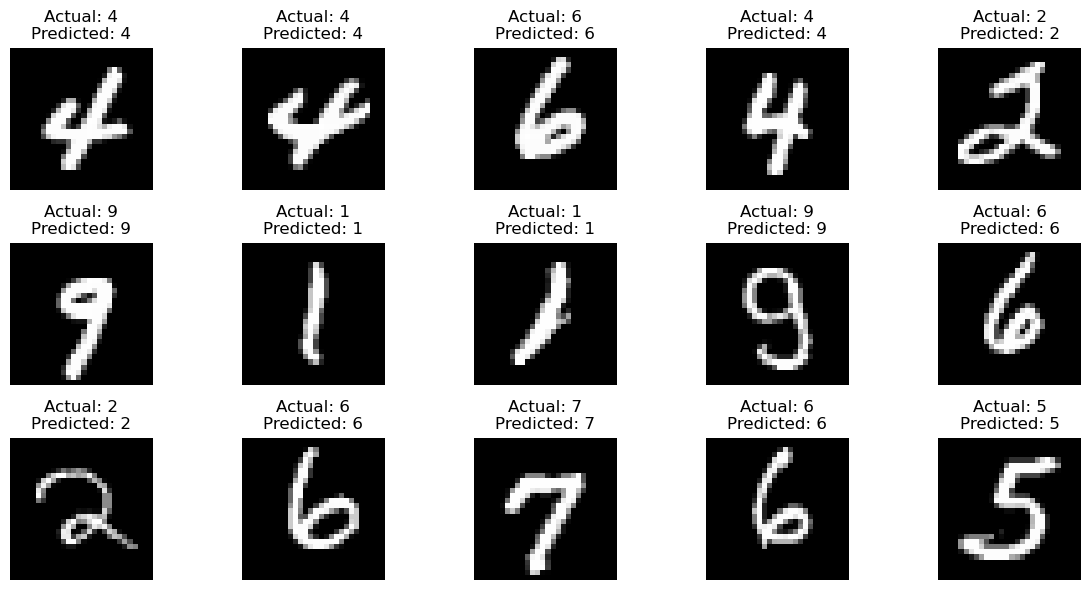

In [32]:
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Select some random test samples (e.g., the first 15)
num_samples_to_display = 15
sample_indices = np.random.choice(len(X_test), num_samples_to_display, replace=False)

# Create a figure to display the comparison
plt.figure(figsize=(12, 6))

for i, sample_index in enumerate(sample_indices):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[sample_index].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {y_test[sample_index]}\nPredicted: {predicted_labels[sample_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()